Import libraries

In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Read the pickles back in

In [2]:
may = pd.read_pickle("../data/may.pkl")
may.head()

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname
0,2019-05-01 00:01:41.247,36.136822,-86.799877,PoweredLIRL1,93.0,0
1,2019-05-01 00:01:41.247,36.191252,-86.772945,PoweredXWRWC,35.0,0
2,2019-05-01 00:01:41.247,36.144752,-86.806293,PoweredMEJEH,90.0,0
3,2019-05-01 00:01:41.247,36.162056,-86.774688,Powered1A7TC,88.0,0
4,2019-05-01 00:01:41.247,36.150973,-86.783109,Powered2TYEF,98.0,0


In [3]:
june = pd.read_pickle("../data/june.pkl")
june.head()

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname
0,2019-06-01 00:00:12,36.1202,-86.7534,Powered93627c35-0f62-5b81-a78d-75a4a92ecf47,90.0,5
1,2019-06-01 00:00:12,36.1630,-86.7765,Powered17715097-e8a0-5494-a5ab-9b625796607d,63.0,5
2,2019-06-01 00:00:12,36.1202,-86.7533,Powerede5cb95ae-b091-5a93-86fa-ededd946d0d7,77.0,5
3,2019-06-01 00:00:12,36.1201,-86.7530,Powered71fa5e4f-1e17-54c4-936d-330df38cc2fa,0.0,5
4,2019-06-01 00:00:12,36.1622,-86.7806,Poweredfa549dd6-40bb-5757-ac87-2c2528f2bc68,2.0,5


In [4]:
july = pd.read_pickle("../data/july.pkl")
july.head()

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname
0,2019-07-01 00:00:33.550,36.156678,-86.809004,Powered635135,22.0,1
1,2019-07-01 00:00:34.973,36.145674,-86.794138,Powered790946,33.0,1
2,2019-07-01 00:00:41.183,36.179319,-86.751538,Powered570380,76.0,1
3,2019-07-01 00:00:41.620,36.152111,-86.803821,Powered240631,43.0,1
4,2019-07-01 00:00:45.087,36.149355,-86.797550,Powered970404,52.0,1


#### Put the company names back in

In [5]:
company_dict = {0:'Bird', 1:'Lyft', 2: 'Gotcha', 3:'Lime', 4: 'Spin', 5: 'Jump', 6: 'Bolt'}
may.companyname = may.companyname.replace(company_dict)
june.companyname = june.companyname.replace(company_dict)
july.companyname = july.companyname.replace(company_dict)

#### Get info on each file

In [6]:
may.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20283582 entries, 0 to 20292502
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   pubdatetime  datetime64[ns]
 1   latitude     float64       
 2   longitude    float64       
 3   sumdid       object        
 4   chargelevel  float64       
 5   companyname  object        
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 1.1+ GB


In [7]:
june.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28037408 entries, 0 to 28046094
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   pubdatetime  datetime64[ns]
 1   latitude     float64       
 2   longitude    float64       
 3   sumdid       object        
 4   chargelevel  float64       
 5   companyname  object        
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 1.5+ GB


In [8]:
july.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25066524 entries, 0 to 25075444
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   pubdatetime  datetime64[ns]
 1   latitude     float64       
 2   longitude    float64       
 3   sumdid       object        
 4   chargelevel  float64       
 5   companyname  object        
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 1.3+ GB


#### Get overview of null values in each file

In [9]:
may.isnull().sum()

pubdatetime      0
latitude         0
longitude        0
sumdid           0
chargelevel    283
companyname      0
dtype: int64

In [10]:
june.isnull().sum()

pubdatetime      0
latitude         0
longitude        0
sumdid           0
chargelevel    285
companyname      0
dtype: int64

In [11]:
july.isnull().sum()

pubdatetime      0
latitude         0
longitude        0
sumdid           0
chargelevel    202
companyname      0
dtype: int64

#### Get the value counts for each file

In [12]:
may.companyname.value_counts()

Lime      7111655
Bird      4334006
Lyft      3112581
Jump      2984630
Spin      1301001
Gotcha     915314
Bolt       524395
Name: companyname, dtype: int64

In [13]:
june.companyname.value_counts()

Jump      8482893
Lime      6152504
Bird      4215302
Lyft      3084229
Spin      2507991
Gotcha    1830453
Bolt      1764036
Name: companyname, dtype: int64

In [14]:
july.companyname.value_counts()

Jump      10367575
Bird       3702282
Lime       3233573
Lyft       2890233
Gotcha     1933513
Spin       1750581
Bolt       1188767
Name: companyname, dtype: int64

Index(['companyname'], dtype='object')


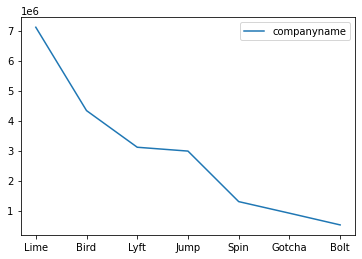

In [15]:
may_cn_vals = may.companyname.value_counts()
may_cn_vals = pd.DataFrame(may_cn_vals)
print(may_cn_vals.columns)
may_cn_vals.sort_values("companyname")
may_cn_vals.plot();

Index(['companyname'], dtype='object')


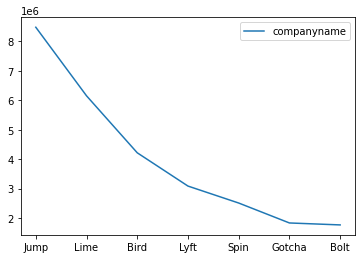

In [16]:
june_cn_vals = june.companyname.value_counts()
june_cn_vals = pd.DataFrame(june_cn_vals)
print(june_cn_vals.columns)
june_cn_vals.sort_values("companyname")
june_cn_vals.plot();

Index(['companyname'], dtype='object')


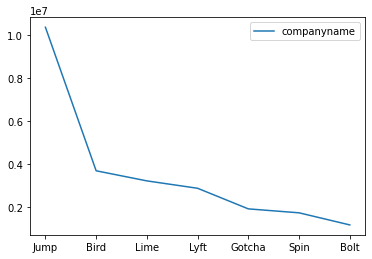

In [17]:
july_cn_vals = july.companyname.value_counts()
july_cn_vals = pd.DataFrame(july_cn_vals)
print(july_cn_vals.columns)
july_cn_vals.sort_values("companyname")
july_cn_vals.plot();

#### Show the number of unique scooters each month

In [18]:
may_n_scooters = int(may.sumdid.nunique())
may_n_scooters

8303

In [19]:
june_n_scooters = int(june.sumdid.nunique())
june_n_scooters

7822

In [20]:
july_n_scooters = int(july.sumdid.nunique())
july_n_scooters

6787

#### Find the mean data for charge levels

In [21]:
may.chargelevel.mean()

65.90530320389674

In [22]:
june.chargelevel.mean()

58.30081921856087

In [23]:
july.chargelevel.mean()

51.51018639711802

#### Charge levels by Company

Text(0.5, 1.0, 'Companies and Charge Levels in May')

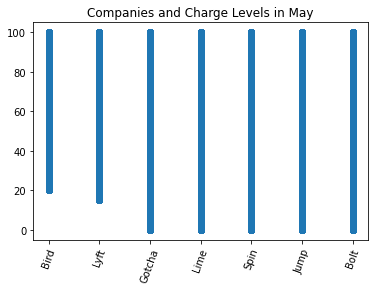

In [24]:
plt.plot('companyname', 'chargelevel', marker= 'o', linestyle='none', data=may)
plt.xticks(rotation=70)
plt.title("Companies and Charge Levels in May")

Text(0.5, 1.0, 'Companies and Charge Levels in June')

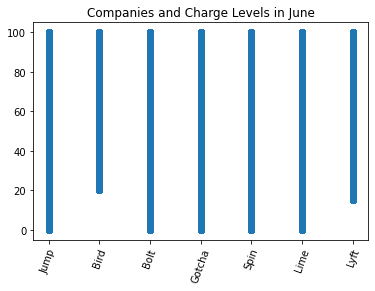

In [25]:
plt.plot('companyname', 'chargelevel', marker= 'o', linestyle='none', data=june)
plt.xticks(rotation=70)
plt.title("Companies and Charge Levels in June")

Text(0.5, 1.0, 'Companies and Charge Levels in July')

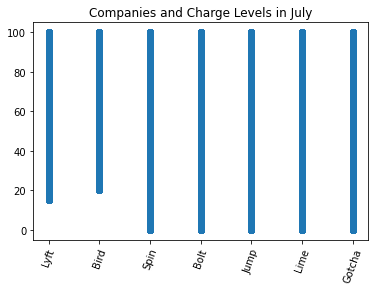

In [26]:
plt.plot('companyname', 'chargelevel', marker= 'o', linestyle='none', data=july)
plt.xticks(rotation=70)
plt.title("Companies and Charge Levels in July")

#### Show the charge level for 

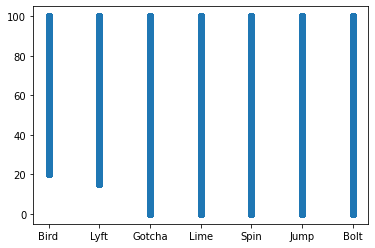

In [27]:
plt.scatter('companyname', 'chargelevel', data=may)

#### Create a df that will let us grab May's locations by time of day

In [28]:
may_avg_charge = may[['companyname', 'chargelevel', 'pubdatetime', 'sumdid']]
may_avg_charge.sort_values(by=['pubdatetime','sumdid'])
may_avg_charge.groupby(by=['pubdatetime', 'sumdid'])
may_avg_charge

,companyname,chargelevel,pubdatetime,sumdid
0,Bird,93.0,2019-05-01 00:01:41.247,PoweredLIRL1
1,Bird,35.0,2019-05-01 00:01:41.247,PoweredXWRWC
2,Bird,90.0,2019-05-01 00:01:41.247,PoweredMEJEH
3,Bird,88.0,2019-05-01 00:01:41.247,Powered1A7TC
4,Bird,98.0,2019-05-01 00:01:41.247,Powered2TYEF
...,...,...,...,...
20292498,Jump,49.0,2019-05-31 23:59:42.000,Poweredbb60ef04-c719-597f-805f-20978964fd8c
20292499,Jump,68.0,2019-05-31 23:59:42.000,Powered9f5743ed-7f81-539b-9e37-6503d54445d3
20292500,Jump,53.0,2019-05-31 23:59:42.000,Powered5744d1db-3bbe-55e5-9a23-a93828ba54fc
20292501,Jump,42.0,2019-05-31 23:59:42.000,Poweredad1d6d3b-162a-5bec-bffd-cac4ac8dee1c


#### Make variables for sectors of the day - morning, midday, afternoon, evening.

##### I may want to create a df for each day with each individual scooter and then the column headers are those sectors of the day, while their contents contain their lat/lng along with their charge level.

In [29]:
# morning = # 6-9:30am
# midday = # 9:30am-11:00am
# lunchtime = # 11:00am-1:00pm
# afternoon = # 1:00pm-4:00pm
# evening = # 4:00pm - 7:00pm
# night = # 7:00pm - 11:59pm

#### Create a list of the days

In [30]:
month_lengths = {'January':31, 'February':28, 'March':31, 'April':30, 'May':31, 'June':30, 'July':31, 'August':31, 'September':30, 'October':31, 'November':30, 'December':31}

#### Create a function to grab each day's sets of coordinates

In [38]:
def day_df(df, month):
    i = 1
    while i < month_lengths[month]:
        for i in range(1,month_lengths[month]):
            start_date = "2019-05-" + str(i)
            end_date = "2019-05-" + str(i+1)
            mask = (df['pubdatetime'] > start_date) & (df['pubdatetime'] <= end_date)
            may1_2 = df.loc[mask]
            i+=1
    return may1_2
    
day_df(may, "May")

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname
18275447,2019-05-30 00:00:24.513,36.121350,-86.770312,Powered2149,84.0,Gotcha
18275448,2019-05-30 00:00:24.513,36.121973,-86.770376,Powered2499,91.0,Gotcha
18275449,2019-05-30 00:00:24.513,36.163169,-86.776097,Powered516,83.0,Gotcha
18275450,2019-05-30 00:00:24.513,36.121376,-86.770386,Powered1981,89.0,Gotcha
18275451,2019-05-30 00:00:24.513,36.121392,-86.770620,Powered1947,94.0,Gotcha
...,...,...,...,...,...,...
19293755,2019-05-30 23:59:59.803,36.166432,-86.766970,Powered117971,34.0,Lyft
19293756,2019-05-30 23:59:59.803,36.156493,-86.782028,Powered837779,69.0,Lyft
19293757,2019-05-30 23:59:59.830,36.150878,-86.782803,Powered218969,74.0,Lyft
19293758,2019-05-30 23:59:59.860,36.145698,-86.805051,Powered854338,72.0,Lyft


In [50]:
def n_loc_scooters(df):
    n_loc = df.sumdid.value_counts()
    df.geometry = str(df.longitude) + str(df.latitude)
    return n_loc
n_loc_scooters(day_df(may, "May"))

PoweredDMHQVTJWMZWVU    288
Powered453              288
PoweredFTMUQQPAHOWBB    288
Powered6NZEAEJ5M4MZ2    288
Powered699              288
                       ... 
Powered6599831            1
Powered9QWUP              1
Powered577651             1
Powered3953444            1
Powered3B6IG              1
Name: sumdid, Length: 5375, dtype: int64

for each chunk of 10 or so, geoplot the coords of each scooter and its time.

for each unique sumdid, create list of all coordinates in the day. This should be one column unto itself

In [52]:
may_uniq_scooters = may.sumdid.unique().tolist()

#### Create a GeoDataFrame from the day

In [31]:
# may_gdf = gpd.GeoDataFrame(may, geometry=gpd.points_from_xy(may.longitude, may.latitude))
# may_gdf.head()
# type(may_gdf)